<a href="https://colab.research.google.com/github/nasaharvest/street2sat/blob/point-plotting/new_point_plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Point Plotting

**Author**: Anjali Paliyam

**Last Modified**: Sep 17, 2024

**Description**: New method of visualizing crop type points using Kenyan admin boundaries



<ipython-input-33-2635010743ea>:45: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf_gadm2.geometry.centroid.x, gdf_gadm2.geometry.centroid.y, gdf_gadm2['NAME_1']):


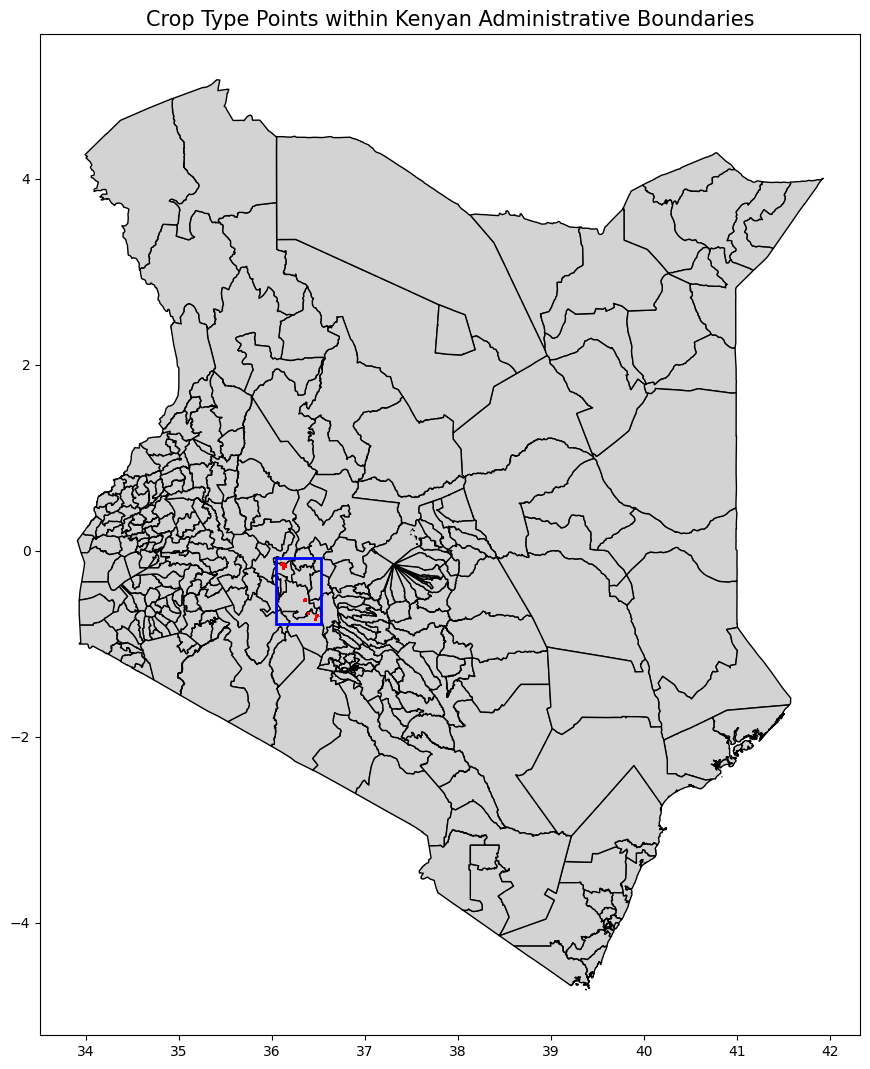

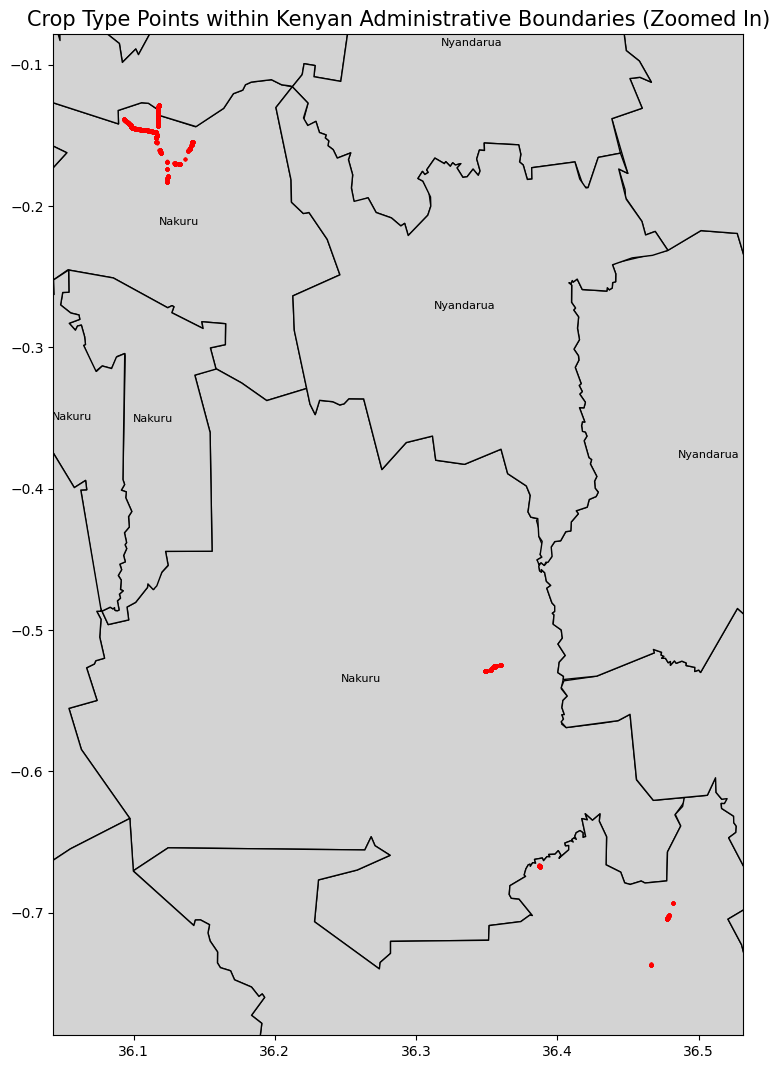

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
from matplotlib.patches import Rectangle

gdf_gadm2 = gpd.read_file("https://geodata.ucdavis.edu/gadm/gadm4.1/json/gadm41_KEN_2.json")
geometry = [Point(xy) for xy in zip(df["lon"], df["lat"])]
gdf_points = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

min_lon, max_lon = df["lon"].min(), df["lon"].max()
min_lat, max_lat = df["lat"].min(), df["lat"].max()

x_min, x_max = [min_lon - 0.05, max_lon + 0.05]
y_min, y_max = [min_lat - 0.05, max_lat + 0.05]

import matplotlib.pyplot as plt

# Zoomed-out version

ax = gdf_gadm2.plot(facecolor="lightgray", edgecolor="black", figsize=(13, 13))

gdf_points.plot(
    ax=ax,
    marker='o',
    color='red',
    markersize=1,
)

rect = Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
                 linewidth=2, edgecolor='blue', facecolor='none', linestyle='-')

ax.add_patch(rect)

plt.title("Crop Type Points within Kenyan Administrative Boundaries", fontsize=15)

# Zoomed-in version

ax = gdf_gadm2.plot(facecolor="lightgray", edgecolor="black", figsize=(13, 13))

gdf_points.plot(
    ax=ax,
    marker='o',
    color='red',
    markersize=3,
)

ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])

for x, y, label in zip(gdf_gadm2.geometry.centroid.x, gdf_gadm2.geometry.centroid.y, gdf_gadm2['NAME_1']):
  if x_min <= x <= x_max and y_min <= y <= y_max:
    ax.text(x, y, label, fontsize=8, ha='center')

plt.title("Crop Type Points within Kenyan Administrative Boundaries (Zoomed In)", fontsize=15)

plt.show()